In [1]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, GRU, Dense, Activation

Using TensorFlow backend.


In [119]:
# modeling

def make_model(in_,out_) :
    from keras.models import Sequential
    from keras.layers import Bidirectional, LSTM, GRU, Dense, Activation, TimeDistributed

    model = Sequential()
    model.add(Bidirectional(GRU(10, return_sequences=True), input_shape=(in_.shape[1], in_.shape[2])))
    model.add(Bidirectional(GRU(10, return_sequences=True)))
    model.add(Dense(1))
    model.add(Activation('linear'))
    model.compile(loss='mse', optimizer='adam')
    model.summary()
    return model

In [3]:
import pandas as pd
import numpy as np

In [10]:
file_path = 'data/apple_stock.csv'

data = pd.read_csv(file_path, index_col='Date')
data.index = pd.to_datetime(data.index)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
data_norm = scaler.fit_transform(np.array(data.Close).reshape(-1, 1))

In [18]:
s2s_trans = data_norm[5:].reshape(-1,10,1)

In [115]:
X_train_s = s2s_trans[:,:5,0].reshape(-1,5,1)
Y_train_s = s2s_trans[:,5:,0].reshape(-1,5,1)

In [116]:
X_train_s.shape, Y_train_s.shape

((226, 5, 1), (226, 5, 1))

In [120]:
model = make_model(X_train_s,Y_train_s)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_48 (Bidirectio (None, 5, 20)             720       
_________________________________________________________________
bidirectional_49 (Bidirectio (None, 5, 20)             1860      
_________________________________________________________________
dense_26 (Dense)             (None, 5, 1)              21        
_________________________________________________________________
activation_9 (Activation)    (None, 5, 1)              0         
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [121]:
history = model.fit(X_train_s, Y_train_s, epochs=200,batch_size=2, verbose=1)

Epoch 1/200
226/226 [==============================] - 5s 20ms/step - loss: 0.0390
Epoch 2/200
226/226 [==============================] - 1s 5ms/step - loss: 0.0033
Epoch 3/200
226/226 [==============================] - 1s 5ms/step - loss: 0.0019
Epoch 4/200
226/226 [==============================] - 1s 5ms/step - loss: 0.0014
Epoch 5/200
226/226 [==============================] - 1s 5ms/step - loss: 9.7118e-04
Epoch 6/200
226/226 [==============================] - 1s 5ms/step - loss: 7.0042e-04
Epoch 7/200
226/226 [==============================] - 1s 5ms/step - loss: 5.1768e-04
Epoch 8/200
226/226 [==============================] - 1s 5ms/step - loss: 4.3740e-04
Epoch 9/200
226/226 [==============================] - 1s 6ms/step - loss: 4.8185e-04
Epoch 10/200
226/226 [==============================] - 1s 5ms/step - loss: 4.5175e-04A: 0s - loss: 4.005
Epoch 11/200
226/226 [==============================] - 1s 6ms/step - loss: 4.3104e-04
Epoch 12/200
226/226 [==========================

226/226 [==============================] - 2s 7ms/step - loss: 4.0998e-04
Epoch 96/200
226/226 [==============================] - 2s 7ms/step - loss: 4.2658e-04
Epoch 97/200
226/226 [==============================] - 2s 7ms/step - loss: 4.6536e-04
Epoch 98/200
226/226 [==============================] - 2s 8ms/step - loss: 4.2737e-04
Epoch 99/200
226/226 [==============================] - 2s 8ms/step - loss: 4.2300e-04
Epoch 100/200
226/226 [==============================] - 2s 8ms/step - loss: 3.8816e-04
Epoch 101/200
226/226 [==============================] - 2s 8ms/step - loss: 3.8571e-04
Epoch 102/200
226/226 [==============================] - 2s 8ms/step - loss: 3.8900e-04
Epoch 103/200
226/226 [==============================] - 2s 8ms/step - loss: 4.7090e-04
Epoch 104/200
226/226 [==============================] - 2s 8ms/step - loss: 3.9231e-04
Epoch 105/200
226/226 [==============================] - 2s 8ms/step - loss: 5.3237e-04
Epoch 106/200
226/226 [===========================

226/226 [==============================] - 3s 12ms/step - loss: 4.8517e-04
Epoch 188/200
226/226 [==============================] - 3s 12ms/step - loss: 4.1078e-04
Epoch 189/200
226/226 [==============================] - 3s 13ms/step - loss: 3.7722e-04
Epoch 190/200
226/226 [==============================] - 3s 13ms/step - loss: 4.4125e-04
Epoch 191/200
226/226 [==============================] - 3s 14ms/step - loss: 3.6115e-04
Epoch 192/200
226/226 [==============================] - 3s 13ms/step - loss: 4.0194e-04
Epoch 193/200
226/226 [==============================] - 3s 14ms/step - loss: 3.9560e-04
Epoch 194/200
226/226 [==============================] - 3s 14ms/step - loss: 4.5590e-04
Epoch 195/200
226/226 [==============================] - 3s 14ms/step - loss: 3.6504e-04
Epoch 196/200
226/226 [==============================] - 3s 14ms/step - loss: 4.0880e-04
Epoch 197/200
226/226 [==============================] - 3s 14ms/step - loss: 4.6768e-04
Epoch 198/200
226/226 [============

In [123]:
y_predict = scaler.inverse_transform(model.predict( s2s_trans[1, 0:5, 0].reshape(-1,5,1)).reshape(-1,1))
print(y_predict)
print()
print(scaler.inverse_transform(np.array(s2s_trans[1, 5:10, 0]).reshape(-1,1)))

[[30.78023 ]
 [30.275667]
 [30.098192]
 [29.790064]
 [29.923487]]

[[27.81857109]
 [27.97999954]
 [28.46142769]
 [27.43571472]
 [27.92285728]]


In [126]:
y_predict = scaler.inverse_transform(model.predict( s2s_trans[32, 0:5, 0].reshape(-1,5,1)).reshape(-1,1))
print(y_predict)
print()
print(scaler.inverse_transform(np.array(s2s_trans[32, 5:10, 0]).reshape(-1,1)))

[[48.57631 ]
 [48.79808 ]
 [49.00249 ]
 [49.012104]
 [49.04175 ]]

[[50.43000031]
 [50.06000137]
 [50.02142715]
 [49.5357132 ]
 [50.01856995]]


In [62]:
data_norm2 = data_norm.reshape(-1,5,1)

In [63]:
X_train_n = data_norm2[:data_norm2.shape[0],0:4,0].reshape(-1,4,1)
Y_train_n = data_norm2[:data_norm2.shape[0],4,0].reshape(-1,1)

In [83]:
def make_model_() :
    model = Sequential()
    model.add(GRU(10, activation='linear', input_shape=(X_train.shape[1],X_train.shape[2]))) 
    model.add(Dense(1))       
    model.compile(loss='mse', optimizer='adam')
    model.summary()
    return model

In [97]:
# modeling

def make_model_2(in_,out_) :
    from keras.models import Sequential
    from keras.layers import Bidirectional, LSTM, GRU, Dense, Activation, TimeDistributed

    model = Sequential()
    model.add(Bidirectional(GRU(10, return_sequences=True), input_shape=(in_.shape[1], in_.shape[2])))
    model.add(Bidirectional(GRU(10)))
    model.add(Dense(1))
    model.add(Activation('linear'))
    model.compile( loss='mse', optimizer='adam')
    model.summary()
    return model

In [98]:
# model fitting

import matplotlib.pyplot as plt
%matplotlib inline

model_n = make_model_2(X_train_n,Y_train_n)

history = model_n.fit(X_train_n, Y_train_n, epochs = 200, validation_split = 0.2, verbose=1)

# plt.plot(history.history['loss'])
# plt.title('loss')
# plt.show()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_38 (Bidirectio (None, 4, 20)             720       
_________________________________________________________________
bidirectional_39 (Bidirectio (None, 20)                1860      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 21        
_________________________________________________________________
activation_8 (Activation)    (None, 1)                 0         
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________
Train on 362 samples, validate on 91 samples
Epoch 1/200
362/362 [==============================] - 3s 9ms/step - loss: 0.0339 - val_loss: 0.1107
Epoch 2/200
362/362 [==============================] - 0s 293us/step - loss: 0.0065 - val_loss: 0.0249


362/362 [==============================] - 0s 242us/step - loss: 8.7233e-05 - val_loss: 5.6658e-04
Epoch 67/200
362/362 [==============================] - 0s 232us/step - loss: 7.7140e-05 - val_loss: 4.1453e-04
Epoch 68/200
362/362 [==============================] - 0s 233us/step - loss: 7.9707e-05 - val_loss: 4.4117e-04
Epoch 69/200
362/362 [==============================] - 0s 237us/step - loss: 7.9204e-05 - val_loss: 4.6334e-04
Epoch 70/200
362/362 [==============================] - 0s 232us/step - loss: 7.8511e-05 - val_loss: 4.1996e-04
Epoch 71/200
362/362 [==============================] - 0s 237us/step - loss: 8.0099e-05 - val_loss: 4.6712e-04
Epoch 72/200
362/362 [==============================] - 0s 234us/step - loss: 7.9988e-05 - val_loss: 5.3333e-04
Epoch 73/200
362/362 [==============================] - 0s 240us/step - loss: 7.8794e-05 - val_loss: 5.1292e-04
Epoch 74/200
362/362 [==============================] - 0s 240us/step - loss: 7.8386e-05 - val_loss: 4.9278e-04
Epoch

Epoch 139/200
362/362 [==============================] - 0s 239us/step - loss: 8.2471e-05 - val_loss: 3.7172e-04
Epoch 140/200
362/362 [==============================] - 0s 237us/step - loss: 8.2720e-05 - val_loss: 4.2714e-04
Epoch 141/200
362/362 [==============================] - 0s 242us/step - loss: 7.3165e-05 - val_loss: 5.2856e-04
Epoch 142/200
362/362 [==============================] - 0s 242us/step - loss: 7.5323e-05 - val_loss: 5.5187e-04
Epoch 143/200
362/362 [==============================] - 0s 231us/step - loss: 8.0428e-05 - val_loss: 5.5854e-04
Epoch 144/200
362/362 [==============================] - 0s 237us/step - loss: 7.9261e-05 - val_loss: 5.6973e-04
Epoch 145/200
362/362 [==============================] - 0s 245us/step - loss: 7.4984e-05 - val_loss: 4.9066e-04
Epoch 146/200
362/362 [==============================] - 0s 248us/step - loss: 7.3208e-05 - val_loss: 4.7192e-04
Epoch 147/200
362/362 [==============================] - 0s 242us/step - loss: 7.5966e-05 - val_

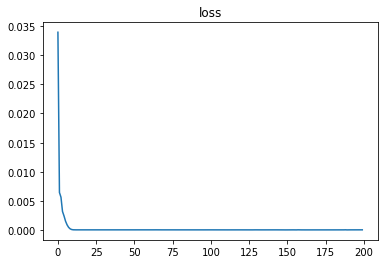

In [99]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()

In [100]:
y_predict = scaler.inverse_transform(model_n.predict( data_norm2[4, 0:4, 0].reshape(-1,4,1)))
print(y_predict,   scaler.inverse_transform(np.array(data_norm2[4 , 4, 0 ]).reshape(-1, 1)))

[[27.760244]] [[27.92285728]]


In [101]:
y_predict = scaler.inverse_transform(model_n.predict( data_norm2[1, 0:4, 0].reshape(-1,4,1)))
print(y_predict,   scaler.inverse_transform(np.array(data_norm2[1 , 4, 0 ]).reshape(-1, 1)))

[[29.844692]] [[29.91857147]]


In [102]:
y_predict = scaler.inverse_transform(model_n.predict( data_norm2[20, 0:4, 0].reshape(-1,4,1)))
print(y_predict,   scaler.inverse_transform(np.array(data_norm2[20, 4, 0 ]).reshape(-1, 1)))

[[36.223736]] [[37.70714188]]


In [103]:
y_predict = scaler.inverse_transform(model_n.predict( data_norm2[35, 0:4, 0].reshape(-1,4,1)))
print(y_predict,   scaler.inverse_transform(np.array(data_norm2[35, 4, 0 ]).reshape(-1, 1)))

[[38.52457]] [[39.33856964]]
